Data investigation\
Patterns inside the data\
Anomalies (normal disribution or skewed)\
Design of hyothsis\ 
Assumptions
Data visualization\
Data Shape (Number of columns or Rows )\
Check Data structure of each column or series\
Missing values in each column and whole data set\
Split variables or make new columns if needed\
Type casting\
Summary statistics\
Value counts of a specific column\
Deal with duplicates\
Check the normal distribution of data (data Anomally)\
Correlation between two variables (columns/series)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#for statistcs
import scipy.stats

1. Data Shape 
   

df #name of your dataframe (like phool or kashti)
df.shape
 output will be like this

Output sample:
(82118, 14) Which shows, rows x columns numbers

In [2]:
#python example

#1- import libraries
import pandas as pd
import numpy as np
import seaborn as sns

#2- import dataset
df = sns.load_dataset('titanic')
#3- find shape

rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)

Number of Rows       =  891
Number of Columns    =  15


In [3]:
# Rename the column name
df.rename(columns={"sex": "gender"}, inplace=True)


2. Check Data structure of each column or series

In [4]:
# python code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


3. Missing values in each column and whole data set

In [5]:
# how many missing values present
df.isnull().sum()

survived         0
pclass           0
gender           0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# percentage of missing values
df.isnull().sum() / df.shape[0] *100

survived        0.000000
pclass          0.000000
gender          0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

4. Split variables or make new columns if needed

In [7]:

df1 = pd.DataFrame(np.array([["Lahore, Pakistan",67, 100], ["Beijing, China", 5, 6], ["berlin, Germany", 8, 9]]),
columns=['address', 'males', 'females'])
df1.head()

address males females
0  Lahore, Pakistan    67     100
1    Beijing, China     5       6
2   berlin, Germany     8       9

In [8]:
# if we want to separate address into city and country columns we will split like this
df1[['city', 'country']] = df1['address'].str.split(',', expand=True)
#to see the results
df1.head()

address males females     city    country
0  Lahore, Pakistan    67     100   Lahore   Pakistan
1    Beijing, China     5       6  Beijing      China
2   berlin, Germany     8       9   berlin    Germany

5. Type casting

In [9]:
#python code
# how to see the types in first place
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      object
 2   females  3 non-null      object
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes


In [10]:
# convert data type into integer
df1[['males', 'females']] = df1[['males', 'females']].astype('int')
#convert to string
df1[["city", "country"]] = df1[["city", "country"]].astype('str')

6. Summary statistics

In [11]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

7. Value counts of a specific column

In [12]:
df['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

8. Deal with duplicates

In [13]:

df[df.embark_town == 'Queenstown']

#this will show the people only embarked from Queenstown in Titanic.

survived  pclass  gender   age  sibsp  parch     fare embarked  class  \
5           0       3    male   NaN      0      0   8.4583        Q  Third   
16          0       3    male   2.0      4      1  29.1250        Q  Third   
22          1       3  female  15.0      0      0   8.0292        Q  Third   
28          1       3  female   NaN      0      0   7.8792        Q  Third   
32          1       3  female   NaN      0      0   7.7500        Q  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
790         0       3    male   NaN      0      0   7.7500        Q  Third   
825         0       3    male   NaN      0      0   6.9500        Q  Third   
828         1       3    male   NaN      0      0   7.7500        Q  Third   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck embark_town alive  alone  
5      man        True  NaN  Queenstown    no   True  
16   child       False  NaN  Queenstown    no  False  
22   child       False  NaN  Queenstown   yes   True  
28   woman       False  NaN  Queenstown   yes   True  
32   woman       False  NaN  Queenstown   yes   True  
..     ...         ...  ...         ...   ...    ...  
790    man        True  NaN  Queenstown    no   True  
825    man        True  NaN  Queenstown    no   True  
828    man        True  NaN  Queenstown   yes   True  
885  woman       False  NaN  Queenstown    no  False  
890    man        True  NaN  Queenstown    no   True  

[77 rows x 15 columns]

9. Check the normal distribution of data (data Anomally)

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

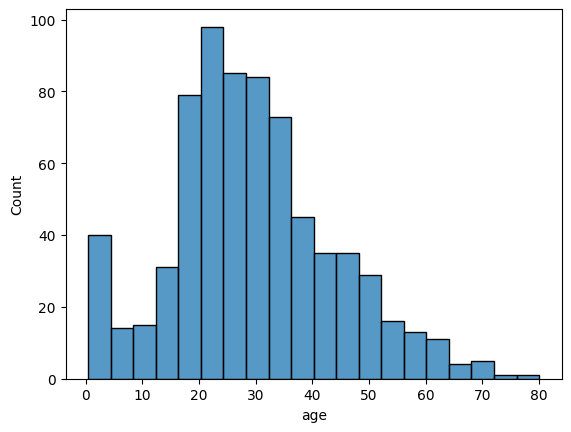

In [14]:
# plot histogram
sns.histplot(df['age'])

In [15]:
#measure its skewness and kurtosis
df['age'].agg(['skew', 'kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

<Axes: >

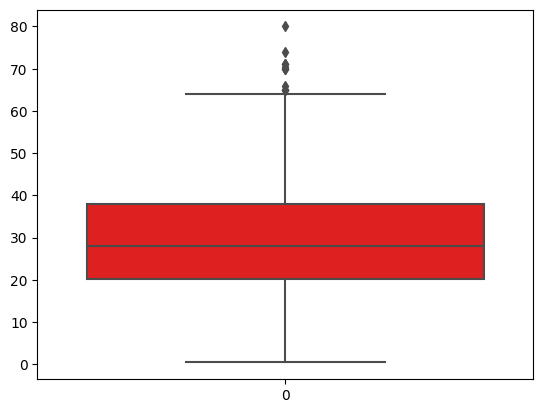

In [16]:
sns.boxplot(df['age'], color="red")

10. Correlation between two variables (columns/series)

In [17]:
# select only numeric columns from data
df = df.select_dtypes(include = ['float64', 'int64'])

In [18]:
# drawing correlation
corr = df.corr(method="pearson") # you can use spearman if you want
corr 
# this will display a correlation matrix

survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

<Axes: >

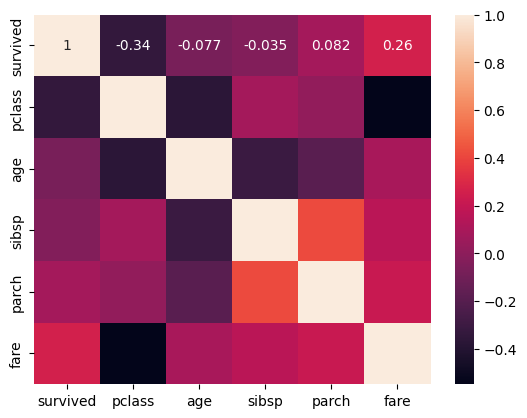

In [19]:
sns.heatmap(corr, annot=True)
# this will show the numbers with colors

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

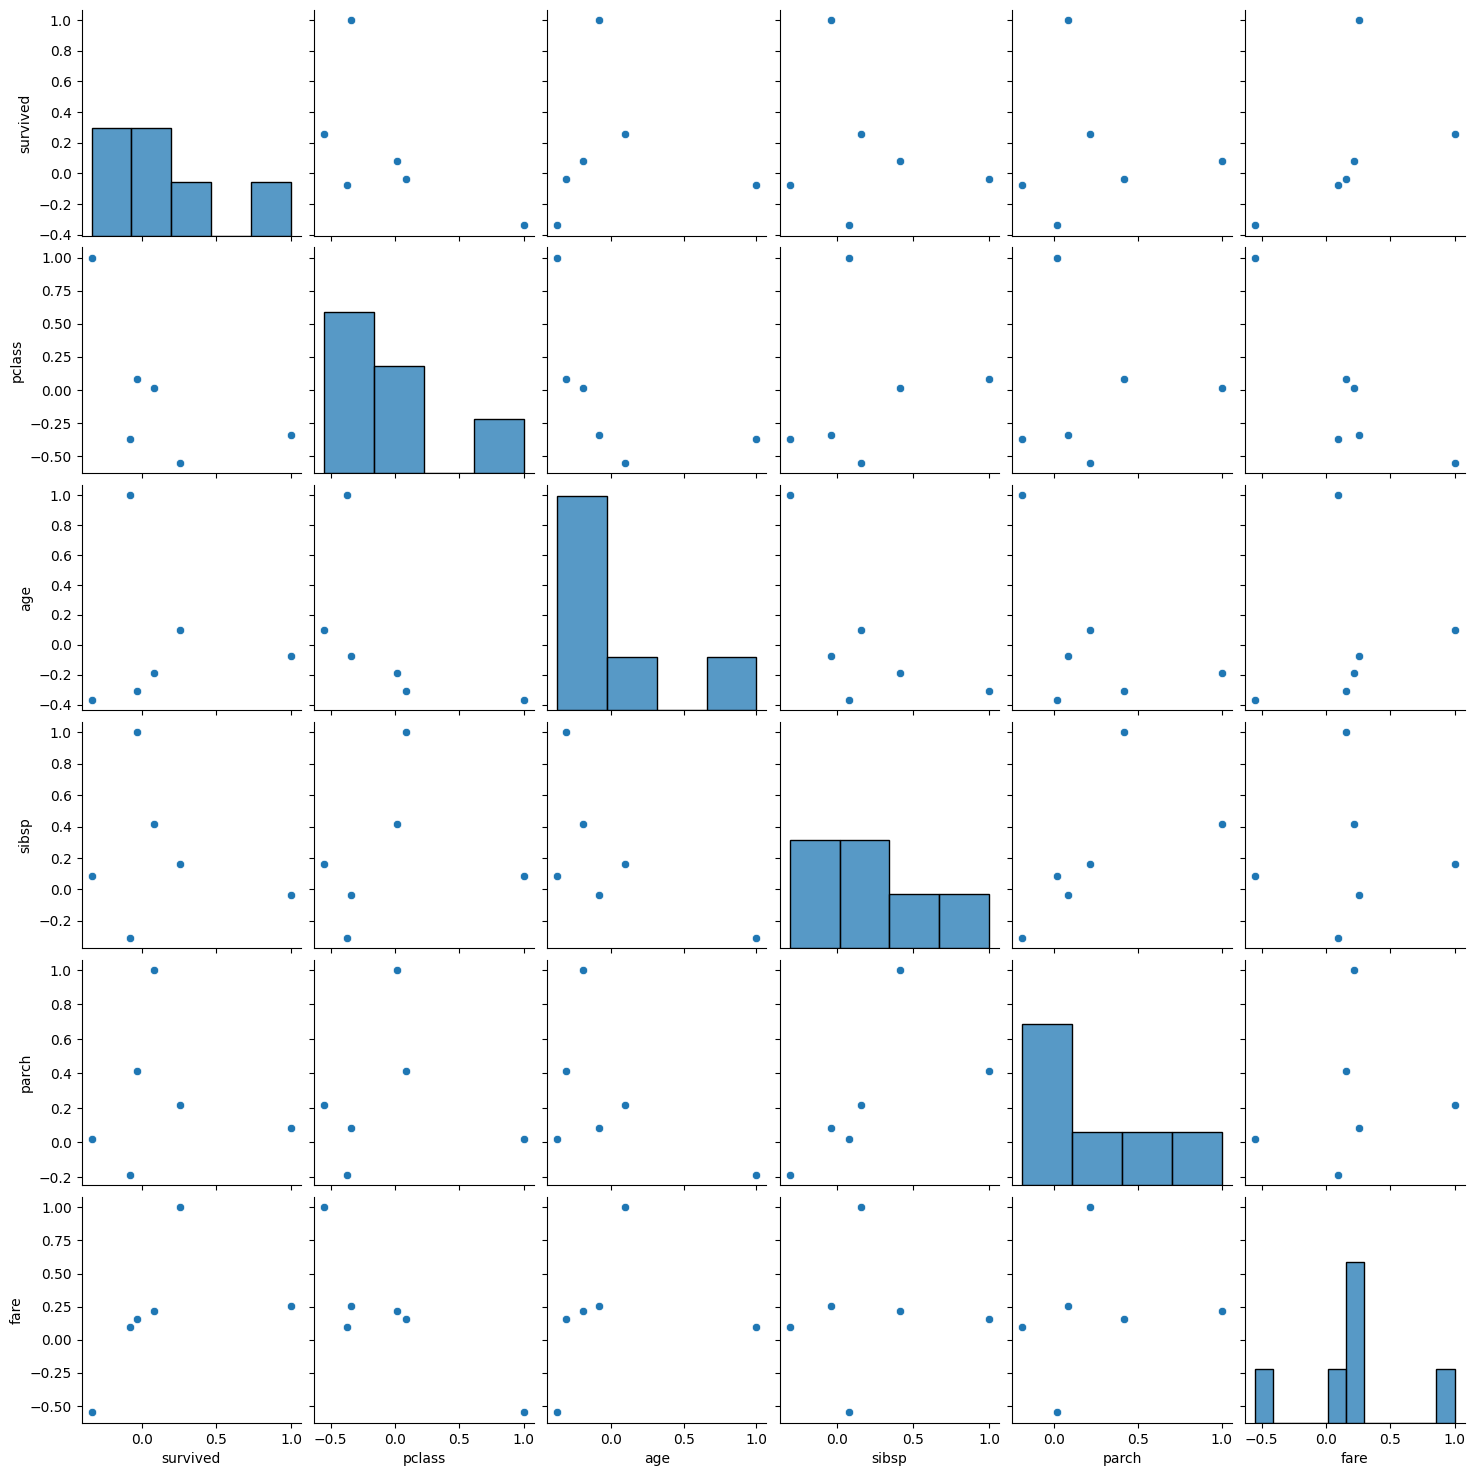

In [20]:
# we can also draw a pairplot to see the correlation
sns.pairplot(corr)

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

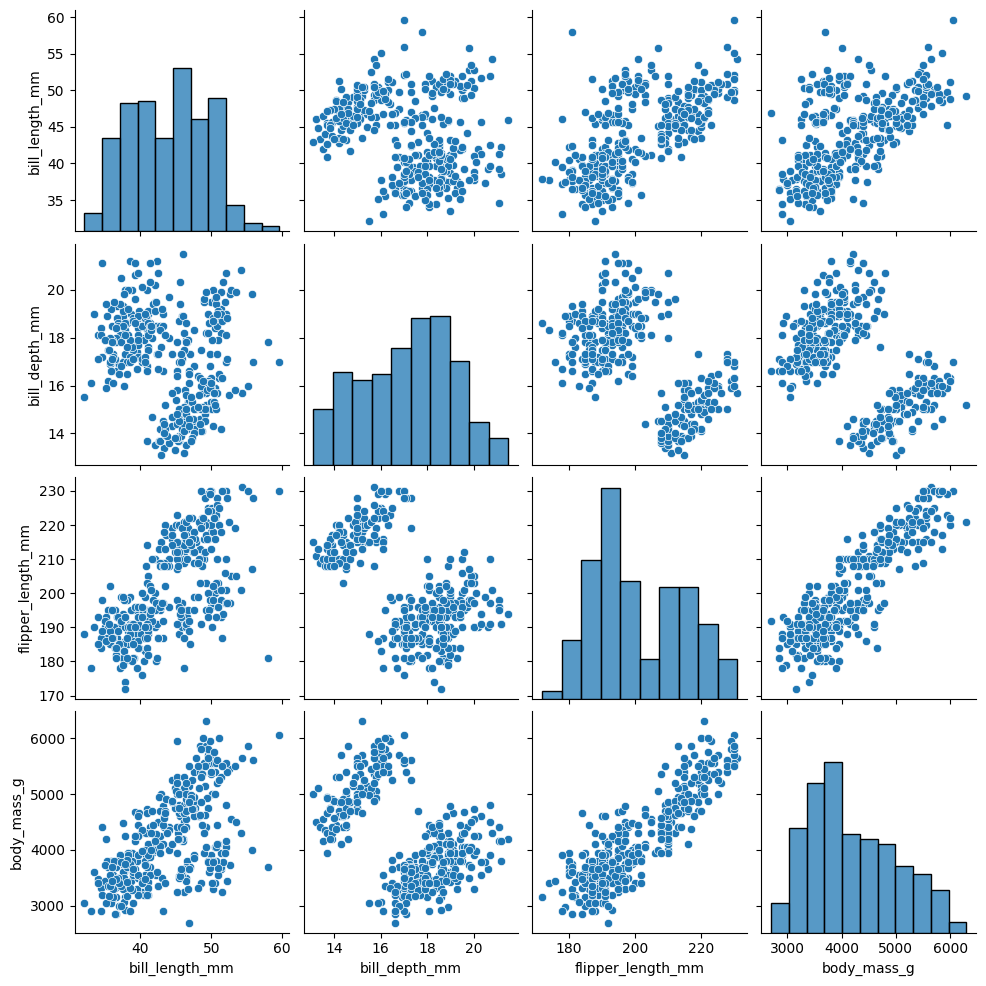

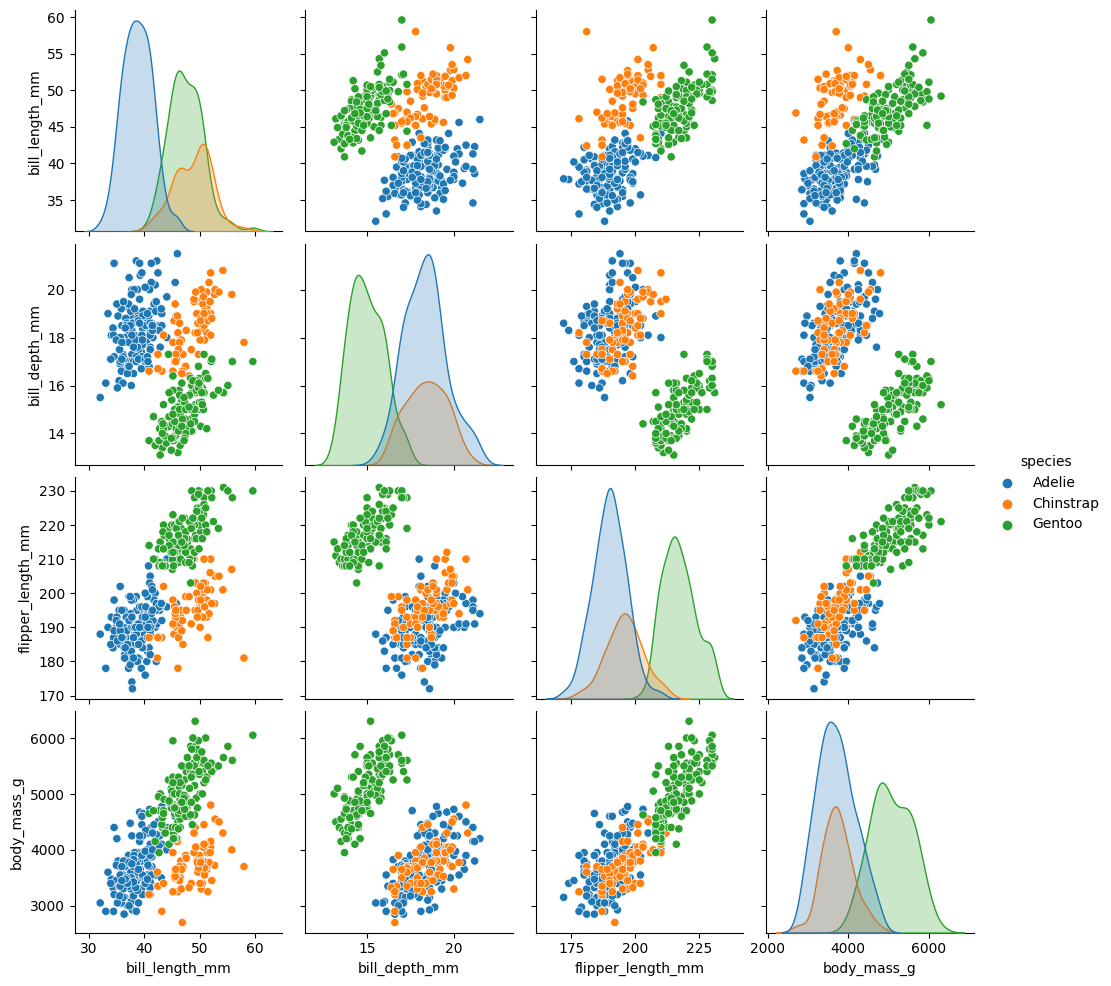

In [21]:
# we can change the points based on category
# import a new dataset
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)
sns.pairplot(penguins, hue="species")

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

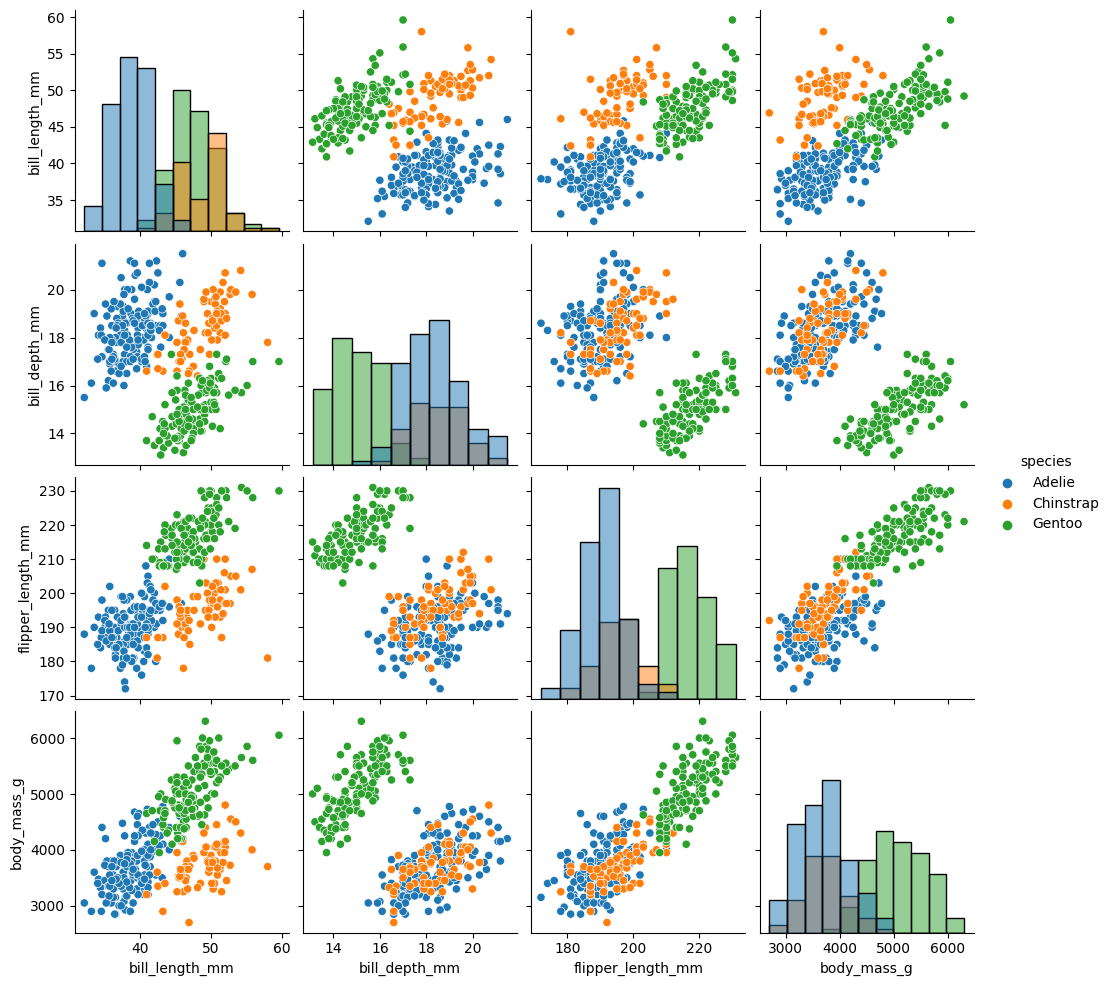

In [22]:
# we can convert this into histograms
sns.pairplot(penguins, hue="species", diag_kind="hist")

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

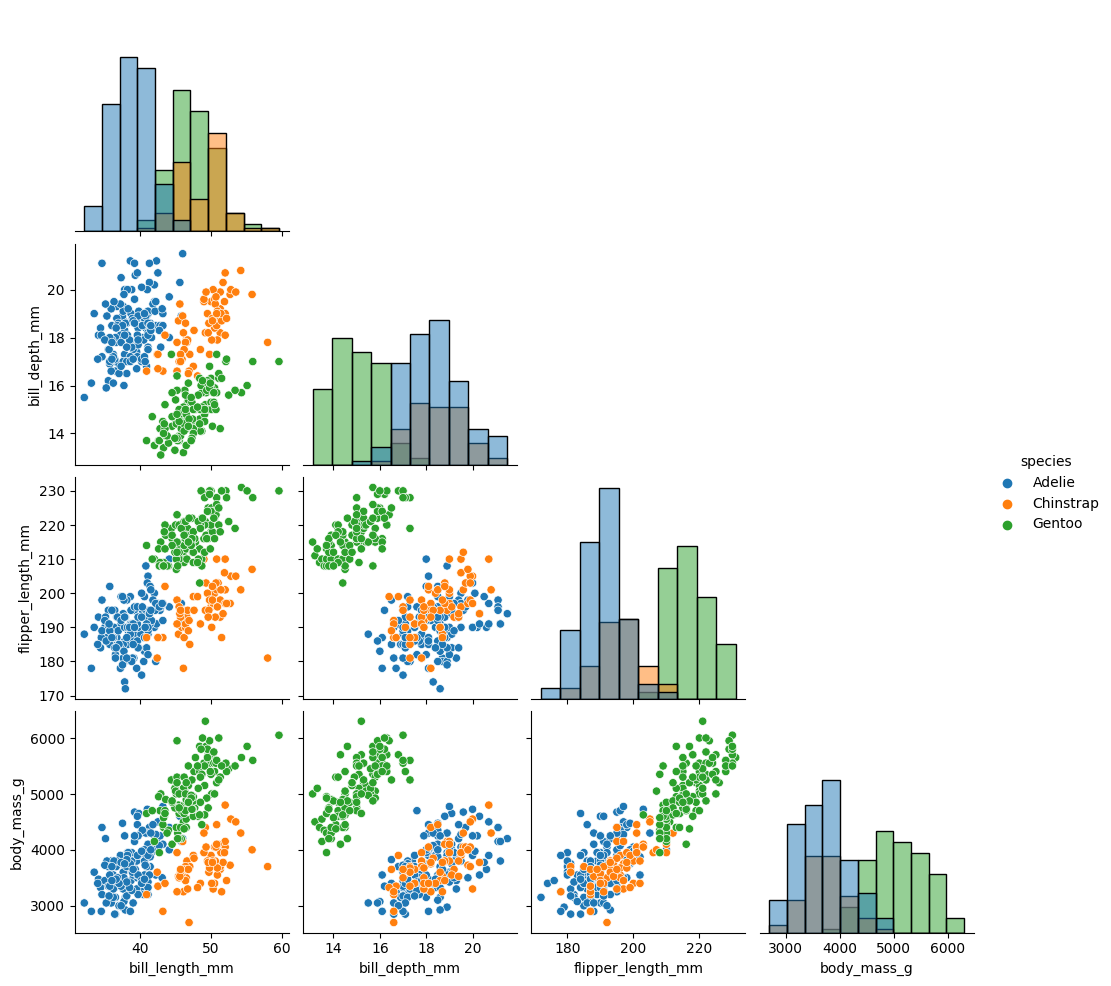

In [23]:
# tomake one sided
sns.pairplot(penguins, hue="species", diag_kind="hist", corner=True)

**Exploratory Data Analysis (EDA)**
It refers to the initial investigation and analysis of data to understand the key properties and patterns within the dataset.


**key aspects of EDA**
Uncovering Insights: Exploring the data to gain insights, form hypotheses and drive the overall analysis process. This helps reveal important relationships and patterns.

Summarizing Data: Calculating summaries like mean, median, mode, standard deviation, minimum, maximum etc. to get an idea of central tendencies and variability in the data.

 Data Quality Checks: Checking for missing values, duplicates, outliers, inconsistencies, errors etc. to verify data quality before modeling or drawing conclusions.

 Visualization: Using charts, plots and visualization techniques to better understand distributions, relationships and spot anomalies in the data. Helps identify what to focus on.
 Transforming Data: Applying techniques like binning, normalizing, aggregating, filtering etc. to make raw data amenable for modeling tasks.
 
 Documentation: Recording observations, insights, conclusions gained from EDA as well as methods used to understand and replay the process later.
 
 The goal of EDA is to uncover the story within data, check assumptions and gain familiarity with the dataset before building machine learning models. It forms a critical early step in any data science or analytics process.
 


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# pip install ydata_profiling

In [26]:
import ydata_profiling as yd

In [27]:
from ydata_profiling import ProfileReport

In [28]:
# pip install ipyWidgets

In [29]:
yd.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile=yd.ProfileReport(df)
profile.to_file('titanic.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x00000220896FCDF0, file "c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 164>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
tip=sns.load_dataset('tips')

In [32]:
tip.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [33]:
tips=yd.ProfileReport(tip)
profile.to_file('tips.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]